# Linear Regression

## Agenda
    1 - Reading dataset
    2 - Data Exploration and Manipulation
    3 - Linear Regression
        What values do we want to predict?
            Short Exemple - just see what is happening 
            Creating a training model.
            How do We actually use this?
    \(*O*)/ Results: printing predictions, inputs and the actual G3 value.
    4 - Saving Model and Plotting Data
        How can we save a better version of our model?
            Why do We get different accuracies?

In [44]:
# Data manipulation
import pandas as pd

# Numeric python
import numpy as np

# Machine learning
import tensorflow
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

# Data visualization
import matplotlib.pyplot as plt

# it serializes objects so they can be saved to a file, and loaded in a program again later on.
import pickle

## 1 - Reading dataset

    As you can see, the data are separated by a semicolon ';'
    and since the default separator for csv document is a comma ','
    the loading will not be made as expected.

In [2]:
data = pd.read_csv('student-mat.csv')

data.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


##### To solve that we just need to specify the "sep" parameter 

In [3]:
data = pd.read_csv('student-mat.csv', sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2 - Data Exploration and Manipulation
        First, look and appreciate the data  *-*). Then we can modify it
        according to our needs.

In [4]:
# Number of rows and columns
data.shape

(395, 33)

##### Basic information about the data. 
    Here we can see there are no NaN values and the column names 
    we're going to be using in the ML model.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#####  Selecting the relevant attributes  

In [6]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.tail()

,G1,G2,G3,studytime,failures,absences
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0
394,8,9,9,1,0,5


## 3 - Linear Regression
    The algorithm can find patterns "only" if we give it information for it to learn from (features).
      But after that, in order to tell us how the data is kind of classified, it also needs a set of
      classes/ values / possible answers (labels) so it will know what to do with each data we fed in.
      It will know how to classify them.
> A feature briefly explained would be the input you have fed to the system and the label would be the output you are expecting.
 
>  Features are patterns, colors, forms... or so to speak, 'column names' in the training dataset.
   Label is the value we want to to predict. The output we get from our model after the training.

        
- **What values do we want to predict?**
     

In this case, We are going to predict the 3th grades. We want to determine what 'G3' is.
        
    Now, we need to prepare the data and then start machine learning.

        

In [7]:
predict = 'G3'

# New "DataFrame" without 'G3'
features = np.array(data.drop([predict], axis="columns")) 

# 'G3' Array (so we can compare the predictions to the real G3 values)
labels = np.array(data[predict])

In [8]:
'''  Splitting the features and labels into random train and test subsets '''

features_train, features_test, labels_train, labels_test = sklearn.model_selection.train_test_split(features, labels,
                                                                                                    test_size=0.1)
# 0.1 (10%) of the data is being allocated as test data while the other 90% is being treated as training data

**[features_train and labels_train] will be used to train our model**<br>
(and make the machine learn)

**[features_test and labels_test] will be used to test the accuracy of our model**<br>
(ratio of number of correct predictions to the total number of input samples)

### |----- _Short Exemple - just see what is happening_ -----|

In [9]:
''' Here's values for X and y '''
X , y = np.arange(10).reshape((5, 2)), np.arange(5)
print('X:\n',X)
print('y:\n',y)

X:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y:
 [0 1 2 3 4]


In [10]:
''' What we are doing '''

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

print('Random X_train values:\n',X_train)
print('\nRandom y_train values:\n',y_train)
print('\nRandom X_test values:\n',X_test)
print('\nRandom y_test values:\n',y_test)

Random X_train values:
 [[8 9]
 [2 3]
 [4 5]
 [0 1]]

Random y_train values:
 [4 1 2 0]

Random X_test values:
 [[6 7]]

Random y_test values:
 [3]


#### |----- End of exemple [ \o/ ] -----|

##### We use linear regression when the variables are directly correlated with each other.
##### Creating a training model.

In [25]:
# linear instance of LinearRegression object
linear = linear_model.LinearRegression()

# It's going to find the best fit line for the linear regression
linear.fit(features_train,labels_train)

# It represents the accuracy of our model
linear_accuracy = linear.score(features_test, labels_test)
print(linear_accuracy)

0.9140753889931454


In [54]:
# It's a LinearRegression() object

linear

LinearRegression()

###### How do We actually use this? 
        Well, let's test it on data to see what we get.
You can use this to visualize the linear function and play with it: https://www.desmos.com/calculator

In [28]:
# In [F(x) = mx + b]  the coefficient is the values for [m] (each slope value)
print('Coefficient ', linear.coef_) 

# Intercept is the expected mean value of Y when all X=0.
print('Intercept ', linear.intercept_)

Coefficient  [ 0.16828745  0.96483469 -0.23170667 -0.25386383  0.03617723]
Intercept  -1.4465965528703464


## Results: printing predictions, the inputs and the actual G3 value

In [38]:
stop_point = 0
predictions = linear.predict(features_test) 

for data in range(len(predictions)):
    print(' ---> Prediction:', predictions[data])
    print(' ---> Input:', features_test[data])
    print(' ---> Actual G3 value:', labels_test[data])
    print('-'*50, '\n')
    if stop_point  == 4: break
    stop_point += 1

 ---> Prediction: 15.348997926092938
 ---> Input: [16 15  3  0  9]
 ---> Actual G3 value: 16
-------------------------------------------------- 

 ---> Prediction: 15.327463993096845
 ---> Input: [16 15  2  0  2]
 ---> Actual G3 value: 15
-------------------------------------------------- 

 ---> Prediction: 8.178311166044134
 ---> Input: [ 9  9  2  2 11]
 ---> Actual G3 value: 9
-------------------------------------------------- 

 ---> Prediction: 12.55635738645104
 ---> Input: [11 13  2  0  2]
 ---> Actual G3 value: 14
-------------------------------------------------- 

 ---> Prediction: 5.176894293497051
 ---> Input: [ 6  6  2  2 22]
 ---> Actual G3 value: 4
-------------------------------------------------- 



## 4 - Saving Model and Plotting Data
As a data scientist, you will use sets of data in the form of dictionaries, DataFrames, or any other data type. When working with those, you might want to save them to a file, so you can use them later on or send them to someone else. This is what Python's pickle module is for: it serializes objects so they can be saved to a file, and loaded in a program again later on.

If you want to know more: https://www.datacamp.com/community/tutorials/pickle-python-tutorial?utm_source=adwords_ppc&utm_campaignid=10267161064&utm_adgroupid=102842301792&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001625&gclid=Cj0KCQjw3ZX4BRDmARIsAFYh7ZJKsxFvusSfuqqRMQsTFfcFR5K2bFCiZyzger-aakFJA6LOlfkpw2MaAj1zEALw_wcB

In [50]:
# Saving into a pickle file
with open('studentmodel.pickle', 'wb') as file:
    pickle.dump(linear, file)

In [52]:
# Reading the model from the pickle
pickle_in = open('studentmodel.pickle', 'rb') 
linear_model_receiver = pickle.load(pickle_in)

# LinearRegression Object Type just like linear
linear_model_receiver

LinearRegression()

###### Now, as you can see We don't need to retrain the model everytime we need to use it. We can just load the 'studentmodel.pickle'

In [55]:
stop_point = 0
predictions = linear_model_receiver.predict(features_test) 

for data in range(len(predictions)):
    print(' ---> Prediction:', predictions[data])
    print(' ---> Input:', features_test[data])
    print(' ---> Actual G3 value:', labels_test[data])
    print('-'*50, '\n')
    if stop_point  == 4: break
    stop_point += 1

 ---> Prediction: 15.348997926092938
 ---> Input: [16 15  3  0  9]
 ---> Actual G3 value: 16
-------------------------------------------------- 

 ---> Prediction: 15.327463993096845
 ---> Input: [16 15  2  0  2]
 ---> Actual G3 value: 15
-------------------------------------------------- 

 ---> Prediction: 8.178311166044134
 ---> Input: [ 9  9  2  2 11]
 ---> Actual G3 value: 9
-------------------------------------------------- 

 ---> Prediction: 12.55635738645104
 ---> Input: [11 13  2  0  2]
 ---> Actual G3 value: 14
-------------------------------------------------- 

 ---> Prediction: 5.176894293497051
 ---> Input: [ 6  6  2  2 22]
 ---> Actual G3 value: 4
-------------------------------------------------- 



## How can we save a better version of our model?
        We'll basically keep saving the model for each time it has a better
        score/accuracy.

In [61]:
actual_best_accuracy = 0

for try_out in range(10):
    # Splitting the features and labels into random train and test subsets
    features_train, features_test, labels_train, labels_test = sklearn.model_selection.train_test_split(features, labels,
                                                                                                    test_size=0.1)
    
    # linear instance of LinearRegression object
    linear = linear_model.LinearRegression()

    # It's going to find the best fit line for the linear regression
    linear.fit(features_train,labels_train)

    # It represents the accuracy of our model
    linear_accuracy = linear.score(features_test, labels_test)
    print(try_out, 'º Accuracy: ', linear_accuracy)
    
    # We're only save a new model if its accuracy is higher than what we had before 
    if linear_accuracy > actual_best_accuracy:
        actual_best_accuracy = linear_accuracy
        # Saving into a pickle file
        with open('studentmodel.pickle', 'wb') as file:
            pickle.dump(linear, file)

0 º Accuracy:  0.8182541210460759
1 º Accuracy:  0.8671564379206653
2 º Accuracy:  0.723037807414916
3 º Accuracy:  0.8694132941851659
4 º Accuracy:  0.8735954690029738
5 º Accuracy:  0.7663484322666876
6 º Accuracy:  0.7362806799602281
7 º Accuracy:  0.7903329347996879
8 º Accuracy:  0.7632638811014522
9 º Accuracy:  0.9252883383870812


#### Why de We get different accuracies?
    It's because everytime We run [sklearn.model_selection.train_test_split()]
    We are getting different training data.

## A simple Visualization of the data
        By the graph format, we can see that
        linear regression is a good model choice for
        predict these data, since there is a direct correlation
        between them.

In [63]:
plt.style.use('ggplot')

In [100]:
data = pd.read_csv('student-mat.csv', sep=';')
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

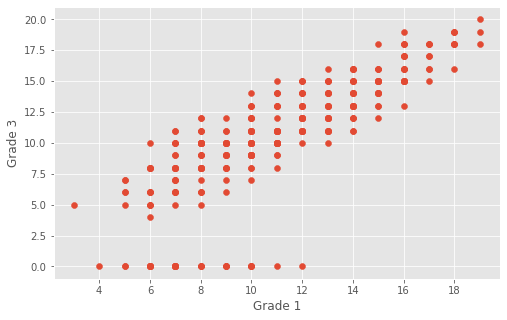

In [71]:
plt.figure(figsize=(8,5))

plt.scatter(data['G1'], data['G3'])
plt.xlabel('Grade 1')
plt.ylabel('Grade 3')

plt.show()